In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/emoji_uncleaned.csv")
df.head(5)

,Tweet,Label
0,A little throwback with my favourite person @ ...,0
1,glam on @user yesterday for #kcon makeup using...,7
2,Democracy Plaza in the wake of a stunning outc...,11
3,Then &amp; Now. VILO @ Walt Disney Magic Kingdom,0
4,Who never... @ A Galaxy Far Far Away,2


In [3]:
print("Sample Raw : ", df['Tweet'][2])

Sample Raw :  Democracy Plaza in the wake of a stunning outcome #Decision2016 @ NBC News


In [4]:
import string
import re

def tweet_clean(tweet):
    tweet = str(tweet).lower()
    rm_mention = re.sub(r'@[A-Za-z0-9]+', '', tweet)                       # remove @mentions
    rm_rt = re.sub(r'RT[/s]+', '', rm_mention)                             # remove RT
    rm_links = re.sub(r'http\S+', '', rm_rt)                               # remove hyperlinks
    rm_links = re.sub(r'https?:\/\/\S+','', rm_links)
    rm_nums = re.sub('[0-9]+', '', rm_links)                               # remove numbers
    rm_punc = [char for char in rm_nums if char not in string.punctuation] # remove punctuations
    rm_punc = ''.join(rm_punc)
    cleaned = rm_punc
    
    return cleaned

In [5]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Cleaned : ",cleaned)

Cleaned :  democracy plaza in the wake of a stunning outcome decision  nbc news


In [6]:
df["Tweet"] = df["Tweet"].apply(tweet_clean)
df.head(5)

,Tweet,Label
0,a little throwback with my favourite person w...,0
1,glam on yesterday for kcon makeup using in f...,7
2,democracy plaza in the wake of a stunning outc...,11
3,then amp now vilo walt disney magic kingdom,0
4,who never a galaxy far far away,2


In [7]:
import nltk
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
import spacy
!python -m spacy download en
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

def tweet_preprocessing(tweet, nlp=nlp, lemmatizer=lemmatizer):
    
    stop_words = nlp.Defaults.stop_words     
    rm_stop_words_lemma = []
    
    doc = nlp(tweet)
    for token in doc:                                            # tokenization
        if token.text not in stop_words and token.pos_!="PUNCT": 
            lemma_word = lemmatizer.lemmatize(token.text)        # removing stop
            rm_stop_words_lemma.append(lemma_word)               # lemmatizing words 
            
    processed = " ".join(rm_stop_words_lemma)
    return processed

     --------------------------------------- 12.8/12.8 MB 10.4 MB/s eta 0:00:00
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.2
    Uninstalling pydantic-1.10.2:
      Successfully uninstalled pydantic-1.10.2
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
tweet = df['Tweet'][2]
cleaned = tweet_clean(tweet)

print("Sample    : ",cleaned)
print("Processed : ",tweet_preprocessing(cleaned))

Sample    :  democracy plaza in the wake of a stunning outcome decision  nbc news
Processed :  democracy plaza wake stunning outcome decision   nbc news


In [9]:
df["Tweet"] = df["Tweet"].apply(tweet_preprocessing)
df.head(10)

,Tweet,Label
0,little throwback favourite person water wall,0
1,glam yesterday kcon makeup featherette,7
2,democracy plaza wake stunning outcome decision...,11
3,amp vilo walt disney magic kingdom,0
4,galaxy far far away,2
5,dinner fla tonight panseared salmon couscous...,1
6,fav senior game congrats beating west west s...,8
7,got formal best friend phi mu jsu,0
8,cause miss little homies throwback cousinlove ...,13
9,birthday kiss madison wisconsin,9


In [10]:
df = pd.read_csv("data/stp_lm.csv")
df.dropna(inplace=True)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
c_vect = CountVectorizer()
X= c_vect.fit_transform(df["Tweet"])
c_vect.get_feature_names_out()[100:110]

array(['absence', 'absentee', 'absinthe', 'absolut', 'absolute',
       'absolutely', 'absolutelybesutifulflower', 'absolutelythem',
       'absolutly', 'abstract'], dtype=object)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

df_mini = df.iloc[:10]

c_vect = CountVectorizer()
X_mini = c_vect.fit_transform(df_mini["Tweet"])

x = X_mini.toarray()
count_vec = pd.DataFrame(x)
count_vec.columns = c_vect.get_feature_names_out()

count_vec

,amp,away,beating,best,birthday,cause,congrats,couscous,cousinlove,decision,...,veggie,vilo,wake,wall,walt,water,west,wisconsin,yesterday,yum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
from sklearn.model_selection import train_test_split

y = df["Label"].values
#X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101, stratify=y,shuffle = True)

In [15]:
print("Training X Dim ",X_train.shape)
print("Training y Dim ",y_train.shape)

Training X Dim  (42487, 54353)
Training y Dim  (42487,)


In [18]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler()
X_train_osm, y_train_osm = os.fit_resample(X_train, y_train)

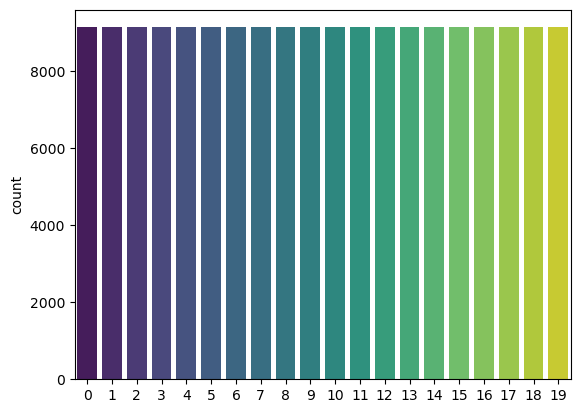

In [19]:
sns.countplot(x=y_train_osm, palette="viridis")
plt.show()

In [24]:
##SVM POLY

In [20]:
#SVM POLM
from sklearn.svm import SVC
clf = SVC(kernel='poly')
#clf = SVC()
clf.fit(X_train_osm, y_train_osm)

SVC(kernel='poly')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)

Text(95.72222222222221, 0.5, 'Truth')

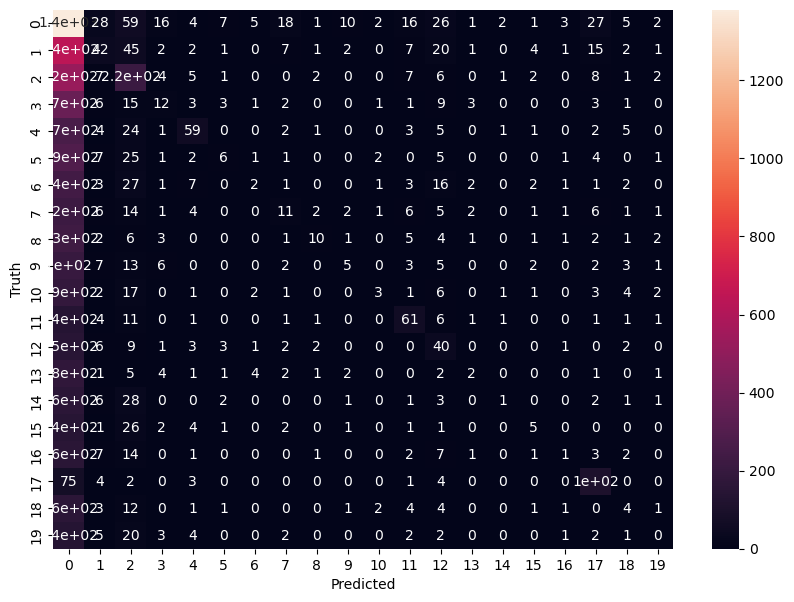

In [38]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.24      0.86      0.37      1614
           1       0.28      0.05      0.09       792
           2       0.37      0.27      0.31       785
           3       0.21      0.03      0.05       433
           4       0.56      0.16      0.24       377
           5       0.23      0.02      0.03       347
           6       0.12      0.01      0.01       307
           7       0.20      0.04      0.06       284
           8       0.45      0.04      0.07       269
           9       0.20      0.02      0.04       251
          10       0.25      0.01      0.02       232
          11       0.49      0.27      0.35       229
          12       0.23      0.18      0.20       219
          13       0.14      0.01      0.02       202
          14       0.14      0.00      0.01       207
          15       0.23      0.03      0.05       187
          16       0.08      0.01      0.01       196
          17       0.56    

In [40]:
#SVM rbf
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
#clf = SVC()
clf.fit(X_train_osm, y_train_osm)

SVC()

Text(95.72222222222221, 0.5, 'Truth')

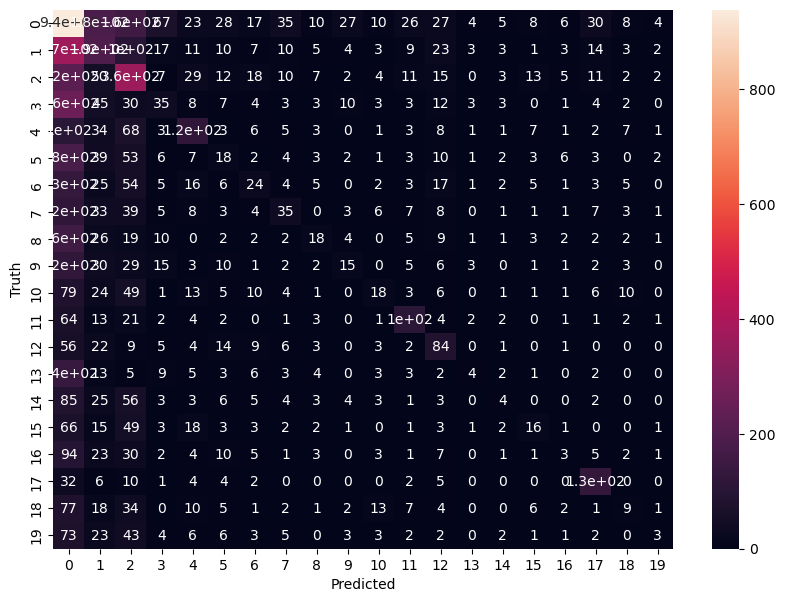

In [41]:
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [42]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.28      0.58      0.38      1614
           1       0.23      0.24      0.24       792
           2       0.30      0.46      0.36       785
           3       0.17      0.08      0.11       433
           4       0.40      0.32      0.35       377
           5       0.11      0.05      0.07       347
           6       0.19      0.08      0.11       307
           7       0.25      0.12      0.17       284
           8       0.24      0.07      0.10       269
           9       0.19      0.06      0.09       251
          10       0.23      0.08      0.12       232
          11       0.52      0.46      0.49       229
          12       0.33      0.38      0.35       219
          13       0.17      0.02      0.04       202
          14       0.11      0.02      0.03       207
          15       0.24      0.09      0.13       187
          16       0.08      0.02      0.03       196
          17       0.57    

In [43]:
#SVM sigmoid
from sklearn.svm import SVC
clf = SVC(kernel='sigmoid',gamma='scale')
clf.fit(X_train_osm, y_train_osm)

SVC(kernel='sigmoid')

Text(95.72222222222221, 0.5, 'Truth')

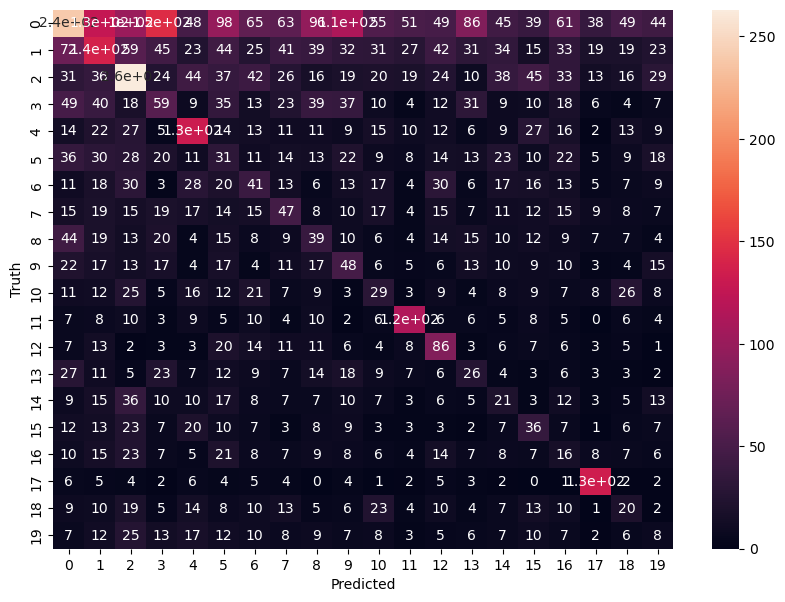

In [44]:
y_predict_test = clf.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.38      0.15      0.21      1614
           1       0.24      0.17      0.20       792
           2       0.36      0.34      0.35       785
           3       0.14      0.14      0.14       433
           4       0.31      0.35      0.33       377
           5       0.07      0.09      0.08       347
           6       0.12      0.13      0.13       307
           7       0.14      0.17      0.15       284
           8       0.11      0.14      0.12       269
           9       0.12      0.19      0.15       251
          10       0.10      0.12      0.11       232
          11       0.40      0.50      0.44       229
          12       0.23      0.39      0.29       219
          13       0.09      0.13      0.11       202
          14       0.07      0.10      0.09       207
          15       0.12      0.19      0.15       187
          16       0.05      0.08      0.06       196
          17       0.50    

NameError: name 'SVC' is not defined